<h2> Bioinformatyka2 - kurs mały. Ćwiczenie1

- Poniższe biblioteki zamieść przed każdym z uruchamianych kodów

In [1]:
import numpy as np #biblioteka do operacji na wektorach, macierzach, funkcje matematyczne itd..
import matplotlib.pyplot as plt #biblioteka do rysowania
import random as r #modul do generowania liczb losowych itp

- Generowanie losowej sekwencji 

a) Uwzględniając jedynie częstości nukleotydów

In [4]:
#Model1. Pozycje są niezależne
def random_seq(length, dist):
    '''Funkcja zwraca losową sekwencje o zadanej dlugosci i zadanej czestosci liter alfabetu'''
    distT = []
    h = 0
    for (k, v) in dist.items():
        h += v
        distT.append((k,h))
    s = ''
    for x in range(length):
        ran = r.random()
        for k,v in distT:
            if ran <= v:
                s+=k
                break
    return s

##############przyklad
dist = {'A':0, 'C':1/3,'G':1/3,'T':1/3}
seq = random_seq(10, dist) #podajemy długość sekwencji, tutaj 10
##############
print(seq)

TTTGCTGTTT


<h4> ZAGADNIENIE1: wygeneruj sekwencję o zadanej długości i ustalonym składzie nukleotydów (np. długość = 30, A = 0, C = 1/2, G = 1/2, T = 0

 - Proste statystyki dla sekwencji

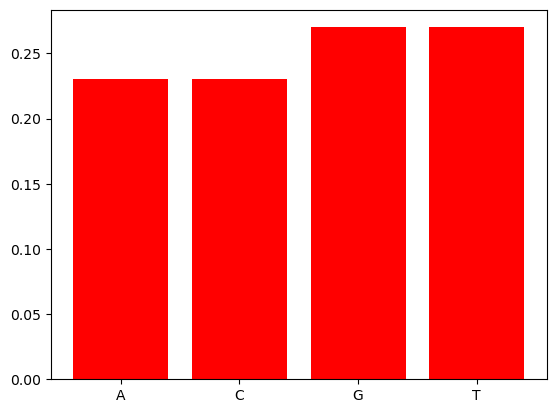

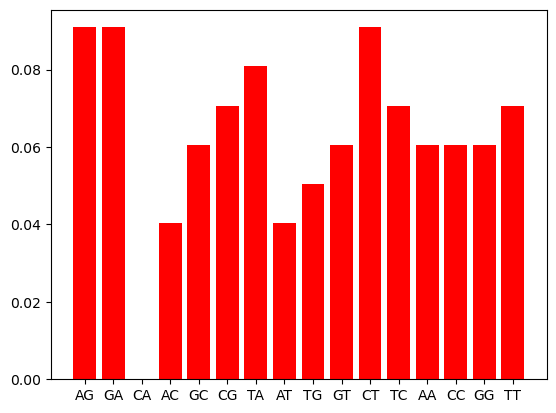

In [6]:
#Wyznaczanie częstosci nukleotydów i dinukleotydów dla zadanej sekwencji 
################################
seq = 'TGACCCCGGTTAAGAGCTAAGATCGCTTTAGGCGTTGGCGAAGTATCCTCTACGTCCTTCGGGAGAAAAGCTGTAGAGGTATCGCTTACTGATTGACTCC'
################################


letters = {'A':0, 'C':0, 'G':0, 'T':0}
diplets = {'AG':0, 'GA':0, 'CA':0, 'AC':0, 'GC':0, 'CG':0, 'TA':0,'AT':0,'TG':0, 'GT':0,'CT':0,'TC':0, 'AA':0, 'CC':0, 'GG':0, 'TT':0}

n = len(seq)-1
for i in range(n):
    letters[seq[i]]+=1
    diplets[seq[i:(i+2)]]+=1
letters[seq[n]]+=1


sumL = sum(letters.values())
norL = {k:v/sumL for k,v in letters.items()}
sumD = sum(diplets.values())
norD = {k:v/sumD for k,v in diplets.items()}

#wizuzalizacja dla nukleotydow
height_norL = norL.values()
bars = norL.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norL,color="red")
plt.xticks(y_pos, bars)
plt.show()

#wizuzalizacja dla dinukleotydow
height_norD = norD.values()
bars = norD.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norD,color="red")
plt.xticks(y_pos, bars)
plt.show()

<h4> ZAGADNIENIE2: narysuj wykres częstości nukleotydów i dinukleotydów dla zadanej sekwencji (np. dla ATGCGCCGCGGCTATCGCGA)

- Reprezentacja gry chaosu (CGR)

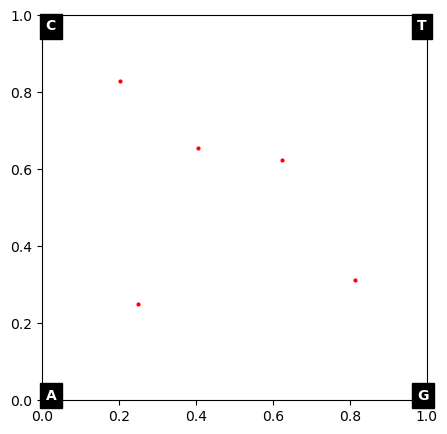

In [7]:
################przykład
seq = "ATGCC"
#######################

def CGR(seq):
    '''Funkcja wyznacza tzw. reprezentację gry chaosu dla danej sekwencji'''
    d = np.array([[0.5,0.5]])
    nt= ["A","C","G","T"]
    coordinates = np.array([[0,0],[0,1],[1,0],[1,1]])
    sequence = []
    for i in range(len(seq)):
        x=0.5*(d[len(d)-1]+coordinates[nt.index(seq[i])])
        sequence.append((x[0],x[1]))
        d = np.vstack((d, x))
    return np.array(sequence)

#przykladowe wywolanie tej funkcji i wizualizacja
p1 = CGR(seq) #wykorzystuje funckje CGR, trzeba ją tez załączyc do kodu

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.scatter(p1[:,0],p1[:,1],c = "red", s = 4, label = "CGR")
#plt.scatter([0.5],[0.5])
ax.text(0.01, 0.03, 'A', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.01, 0.99, 'C', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.03, 'G', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.99, 'T', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')

plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig("obrazek.png", dpi=300) #Jak chcemy zapisac do pliku to odkomentowac (skasować # na początku)
plt.show()

<h4> ZAGADNIENIE3: narysuj reprezentację gry chaosu (CGR) dla zadanej sekwencji (np. dla ATGCGCCGCGGCTATCGCGA)

<h3> Metody porównania sekwencji biologicznych bez dopasowania (free-alignment methods)

Uwaga: W przypadku metod bez dopasowania zazwyczaj liczymy odległość między sekwencjami -> im mniejsza wartość tym większe podobieństwo.

- Metoda oparta o k-mery z przykładem porównania ze sobą dwóch sekwencji

In [9]:
#k-comparison
def kmers(seq, k = 3):
    '''Funkcja wyznacza liczbę k-merow'''
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
    return d

def k_comparison(seq1, seq2, k=3):
    '''Funkcja wyznacza odlelgosc pomiędzy dwoma sekwencjami w oparciu o k-mery'''
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)
    all_mers = []
    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)
    distance = 0
    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
    return round(distance**0.5,2)


##########################przyklad dzialania
s1 = "ATGCC"
s2 = "TGCCA"
print(k_comparison(s1, s2, k=3)) #wystarczy tylko tutaj zmienić k jak potrzebujemy
##########################

1.41


<h4> ZAGADNIENIE4: porównaj dwie sekwencje za pomocą metody k-merów dla danego k (np. porównaj sekwencje ATGGCGC oraz ATCCGC dla k=4)

- Metoda oparta o złożoność Lempel-Ziv z przykładem porównania ze sobą dwóch sekwencji

In [2]:
def WordSeq(seq):
    '''Funkcja wyznacza slowa w danej sekwencji'''
    d=[]
    l=len(seq)
    i=0
    k=1
    n=0
    while i<l:
        while seq[i:i+k] in d and seq[::-1][-(i+k):-(i)] in d and i+k<l:
            k+=1
        if seq[i:i+k] not in d:     
            d.append(seq[i:i+k]) 
        i+=k  
        k=1   
    return d


def words_comparison(seq1, seq2):
    '''Funkcja wyznacza odlelgosc pomiędzy dwoma sekwencjami w oparciu o slowa'''
    l1 = len(WordSeq(seq1))
    l2 = len(WordSeq(seq2))
    l3 = len(WordSeq(seq1+seq2))
    C = (l3 - min(l1,l2))/max(l1,l2)
    return C


################################przyklad dzialania
s1 = "ATGTGTG"
s2 = "CATGTG"
print(words_comparison(s1, s2))
################################

0.6


<h4> ZAGADNIENIE5: porównaj dwie sekwencje za pomocą metody Lempel-Ziv (np. porównaj sekwencje ATGGCGC oraz ATCCGC)